# Cumulative Particle-Density Distributions
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 7/2/2021|
|Updated | 7/22/2021|

## Background

### [Probability Density Function (PDF)](https://en.wikipedia.org/wiki/Probability_density_function)
- A random variable $X$ has density $f_X$ if
    \begin{align}
    d\mathrm{P} &= f_{X}(x)dx, \\
    \mathrm{P}(a \leq X \leq b) &= \int_{a}^{b} f_{X}(x) d x.
    \end{align}
- Intuitively, one can think of $f_{X}(x)\,dx$ as being the probability of $X$ falling within      the infinitesimal interval $[x,x+dx]$.
- PDFs are nonnegative everywhere, with an integral over the entire space equal to unity.
- A PDF can evaluate to greater than one; e.g., a uniform dist. on [0, 1/2] has $f_X(x) = 2$ for $0 \leq x \leq 1/2$ and $f_X(x) = 0$ elsewhere.

### [Cumulative Distribution Functions (CDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function) 
- CDFs are _non-decreasing_ and _right-continuous_, defined as $$F_{X}(x)=\mathrm{P}(X \leq x),$$ such that $$\lim _{x \rightarrow-\infty} F_{X}(x)=0, \quad \lim _{x \rightarrow \infty} F_{X}(x)=1$$
- Since the relationship between CDFs and PDFs is
$$
F_{X}(x)=\int_{-\infty}^{x} f_{X}(u) d u,
$$
with
$$
f_{X}(x)=\frac{dF_{X}(x)}{d x},
$$
then
$$
\lim _{x \rightarrow \infty} F_{X}(x)=\int_{-\infty}^{\infty} f_{X}(u) d u = 1,
$$   

In [1]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

## Using CDF (Binless)

### np4 (cc-mod, 128$^2$)

In [2]:
# Collect .athdf outputs
athinput = athena_read.athinput('athinput/cc-mod.athinput.si')
outputs = sorted(list(Path('athdf/cc-mod').glob(athinput["job"]["problem_id"]+'.out2.*.athdf')))

In [3]:
# Init sim constants and grid
nx1 = athinput['mesh']['nx1']              # num. radial zones
nx2 = athinput['mesh']['nx2']              # num. vertical zones
nx3 = athinput['mesh']['nx3']              # num. azimuthal zones
zones = nx1*nx2*nx3                        # total num. of zones
c_s = athinput['hydro']['iso_sound_speed'] # sound speed
Omega = athinput['problem']['omega']       # local Keplerian angular frequency
epsilon = athinput['problem']['epsilon']   # avg. dust/gas ρ-ratio in BG state
Np_tot = athinput['problem']['npx1']\
    *athinput['problem']['npx2']\
    *athinput['problem']['npx3']           # total number of particles
Np = Np_tot/nx1/nx2/nx3                    # theo avg num particles per cell
H = c_s / Omega                            # gas scale height
T = 2*np.pi/Omega                          # orbital period
data = athena_read.athdf(outputs[0])
xf, zf = data['x1f'] / H, data['x2f'] / H

#### References:
- [How to calculate and plot a Cumulative Distribution function with Matplotlib in Python](https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/)

In [4]:
# Load data into memory
times, rhopxs = [], []

for output in outputs:
    data = athena_read.athdf(output)
    times.append(data['Time'] / T)
    temp = data['rhop'].flatten() / epsilon # flatten & convert
    temp = np.extract(temp>=0.1, temp)       # remove values < 0.1
    rhopxs.append(np.sort(temp))            # sort
    
# Construct CDFs
cdf = np.arange(rhopxs[0].size-1, -1, -1) / rhopxs[0].size
cdfs = np.full((len(outputs), cdf.size), cdf)

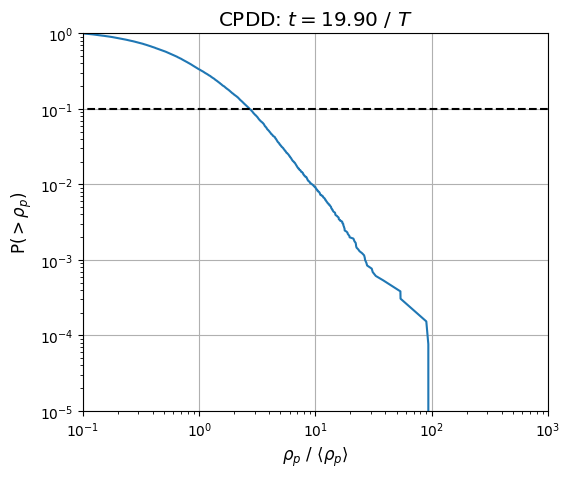

In [5]:
# CPDD
fig, ax = plt.subplots(figsize=(6,5), dpi=100)
# ax.set_aspect('equal')
ax.set_title('CPDD: $t={:.2f}$ / $T$'.format(times[0]), size='x-large')
ax.set_xlabel(r'$\rho_p$ / $\langle \rho_p \rangle$', size='large')
ax.set_ylabel(r'P$(>\rho_p)$', size='large')
ax.loglog(rhopxs[0], cdfs[0])
ax.plot([1e-2, 1e3], [1e-1, 1e-1], '--', color='black')
ax.set_xlim(0.1, 1000)
ax.set_ylim(1e-5, 1)
ax.grid()

### np4 (256$^2$)

In [6]:
# Collect .athdf outputs
athinput = athena_read.athinput('athinput/np4.athinput.si')
outputs = sorted(list(Path('athdf/np4').glob(athinput["job"]["problem_id"]+'.out2.*.athdf')))

In [7]:
# Init sim constants and grid
nx1 = athinput['mesh']['nx1']              # num. radial zones
nx2 = athinput['mesh']['nx2']              # num. vertical zones
nx3 = athinput['mesh']['nx3']              # num. azimuthal zones
zones = nx1*nx2*nx3                        # total num. of zones
c_s = athinput['hydro']['iso_sound_speed'] # sound speed
Omega = athinput['problem']['omega']       # local Keplerian angular frequency
tau_s = athinput['particles']['taus0']*Omega # dimensionless stopping time
epsilon = athinput['problem']['epsilon']   # avg. dust/gas ρ-ratio in BG state
Np_tot = athinput['problem']['npx1']\
    *athinput['problem']['npx2']\
    *athinput['problem']['npx3']           # total number of particles
Np = Np_tot/nx1/nx2/nx3                    # theo avg num particles per cell
H = c_s / Omega                            # gas scale height
T = 2*np.pi/Omega                          # orbital period

data = athena_read.athdf(outputs[0])
xf, zf = data['x1f'] / H, data['x2f'] / H

In [8]:
# Load data into memory
times, rhopxs = [], []

for output in outputs:
    data = athena_read.athdf(output)
    times.append(data['Time'] / T)
    temp = data['rhop'].flatten() / epsilon # flatten & convert
    temp = np.extract(temp>=0.1, temp)      # remove values < 0.1
    rhopxs.append(np.sort(temp))            # sort
    
# Construct CDFs
# cdf = np.arange(rhopxs[0].size-1, -1, -1) / rhopxs[0].size
cdf = np.linspace(1, 0, rhopxs[0].size, endpoint=False)

In [9]:
rhopx1 = rhopxs[0]

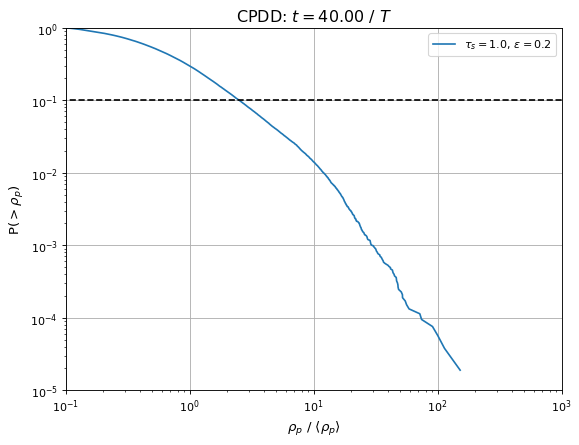

In [10]:
# CPDD
fig, ax = plt.subplots(figsize=(8,6), dpi=80)
# ax.set_aspect('equal')
ax.set_title('CPDD: $t={:.2f}$ / $T$'.format(times[0]), size='x-large')
ax.set_xlabel(r'$\rho_p$ / $\langle \rho_p \rangle$', size='large')
ax.set_ylabel(r'P$(>\rho_p)$', size='large')
ax.loglog(rhopxs[0], cdf,
          label=r'$\tau_s={:.1f},\,\epsilon={:.1f}$'.format(tau_s, epsilon))
ax.plot([1e-2, 1e3], [1e-1, 1e-1], '--', color='black')
ax.set_xlim(0.1, 1000)
ax.set_ylim(1e-5, 1)
ax.legend()
ax.grid()

## Using Historgram (Bins)

In [11]:
# Load data into memory
bins = np.logspace(-1, 3, 1000)
# bins = np.linspace(0.1, 1e3, 1000)
times, rhopxs = [], []

for output in outputs:
    data = athena_read.athdf(output)
    times.append(data['Time'] / T)
    rhopxs.append(np.sort(data['rhop'].flatten()) / epsilon) # flat & sorted

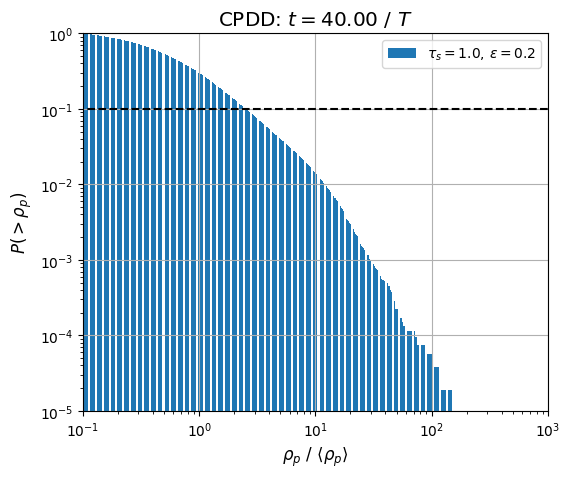

In [12]:
# CPDD
fig, ax = plt.subplots(figsize=(6,5), dpi=100)
# ax.set_aspect('equal')
ax.set_title('CPDD: $t={:.2f}$ / $T$'.format(times[0]), size='x-large')
ax.set_xlabel(r'$\rho_p$ / $\langle \rho_p \rangle$', size='large')
ax.set_ylabel(r'$P(>\rho_p)$', size='large')
ax.hist(rhopxs[0], bins, cumulative=-1, density=True,
        histtype='bar',  rwidth=0.7, 
        label=r'$\tau_s={:.1f},\,\epsilon={:.1f}$'.format(tau_s, epsilon))
ax.plot([1e-2, 1e3], [1e-1, 1e-1], '--', color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.1, 1000)
ax.set_ylim(1e-5, 1)
ax.legend()
ax.grid()

## CDF vs. Histogram Comparison

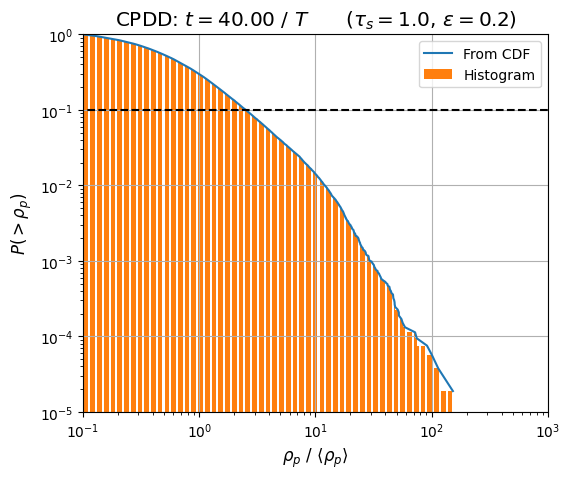

In [13]:
# CPDD
fig, ax = plt.subplots(figsize=(6,5), dpi=100)
# ax.set_aspect('equal')
ax.set_title(r'CPDD: $t={:.2f}$ / $T \qquad (\tau_s={:.1f},\,\epsilon={:.1f})$'\
             .format(times[0], tau_s, epsilon), size='x-large')
ax.set_xlabel(r'$\rho_p$ / $\langle \rho_p \rangle$', size='large')
ax.set_ylabel(r'$P(>\rho_p)$', size='large')
ax.loglog(rhopx1, cdf, label='From CDF')
ax.hist(rhopxs[0], bins, cumulative=-1, density=True,
        histtype='bar', label='Histogram', rwidth=0.7)
ax.plot([1e-2, 1e3], [1e-1, 1e-1], '--', color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.1, 1000)
ax.set_ylim(1e-5, 1)
ax.legend()
ax.grid()

## Time-averaged Run Comparison (< 0.1 Cut)

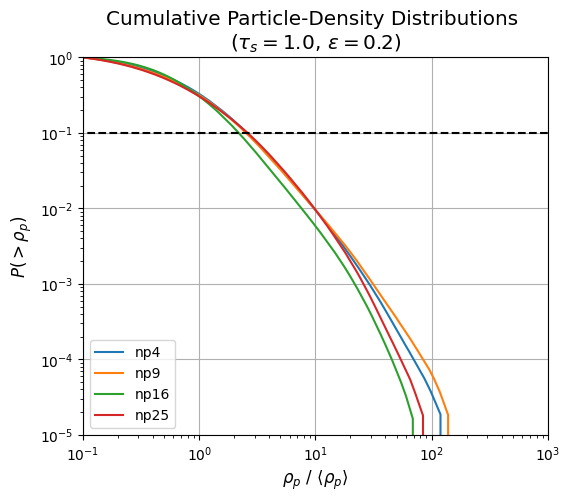

In [14]:
# load NAS results
data = np.loadtxt('txt/CPDD_np4.txt')   # return (N, 2) array
np4_rhops = data[:, 0]                  # return only 1st col
np4_cdf = data[:, 1]                    # return only 2nd col
data = np.loadtxt('txt/CPDD_np9.txt')
np9_rhops = data[:, 0]
np9_cdf = data[:, 1]
data = np.loadtxt('txt/CPDD_np16.txt')
np16_rhops = data[:, 0]
np16_cdf = data[:, 1]
data = np.loadtxt('txt/CPDD_np25.txt')
np25_rhops = data[:, 0]
np25_cdf = data[:, 1]

# CPDD
fig, ax = plt.subplots(figsize=(6,5), dpi=100)
# ax.set_aspect('equal')
ax.set_title('Cumulative Particle-Density Distributions \n'\
             +r'($\tau_s={:.1f},\,\epsilon={:.1f}$)'
             .format(tau_s, epsilon), size='x-large')
ax.set_xlabel(r'$\rho_p$ / $\langle \rho_p \rangle$', size='large')
ax.set_ylabel(r'$P(>\rho_p)$', size='large')
ax.loglog(np4_rhops, np4_cdf, label='np4')
ax.loglog(np9_rhops, np9_cdf, label='np9')
ax.loglog(np16_rhops, np16_cdf, label='np16')
ax.loglog(np25_rhops, np25_cdf, label='np25')
ax.plot([1e-2, 1e3], [1e-1, 1e-1], '--', color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.1, 1000)
ax.set_ylim(1e-5, 1)
ax.legend(loc='lower left')
ax.grid()

## CPDDs (Full)

### np4

In [15]:
# load NAS results
data = np.loadtxt('txt/CPDD_np4_min.txt') # return (N, 2) array
np4_cdf = data[:, 1]                      # return only 2nd col
np4_min_rhops = data[:, 0]                # return only 1st col
data = np.loadtxt('txt/CPDD_np4_max.txt')
np4_max_rhops = data[:, 0]
data = np.loadtxt('txt/CPDD_np4_avg.txt')
np4_avg_rhops = data[:, 0]
data = np.loadtxt('txt/CPDD_np4_std.txt')
np4_std_rhops = data[:, 0]

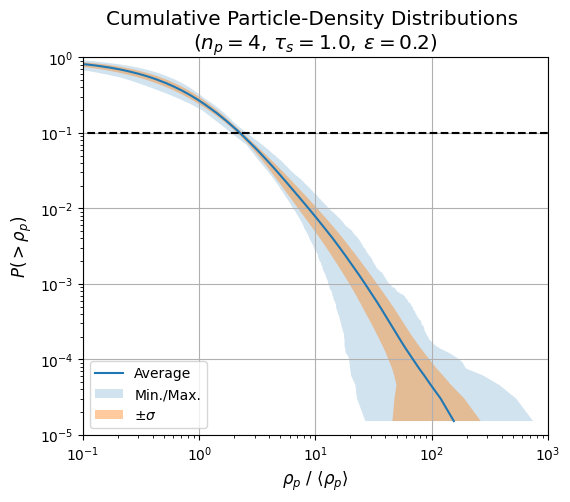

In [16]:
# CPDD
fig, ax = plt.subplots(figsize=(6,5), dpi=100)
# ax.set_aspect('equal')
ax.set_title('Cumulative Particle-Density Distributions \n'\
             +r'($n_p=4,\,\tau_s={:.1f},\,\epsilon={:.1f}$)'
             .format(tau_s, epsilon), size='x-large')
ax.set_xlabel(r'$\rho_p$ / $\langle \rho_p \rangle$', size='large')
ax.set_ylabel(r'$P(>\rho_p)$', size='large')
ax.loglog(np4_avg_rhops, np4_cdf, label='Average')
ax.fill_betweenx(np4_cdf, np4_min_rhops, np4_max_rhops, alpha=0.2,
                 label='Min./Max.')
ax.fill_betweenx(np4_cdf, np4_avg_rhops-np4_std_rhops,
                 np4_avg_rhops+np4_std_rhops, alpha=0.4,
                 label=r'$\pm\sigma$')
ax.plot([1e-2, 1e3], [1e-1, 1e-1], '--', color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.1, 1000)
ax.set_ylim(1e-5, 1)
ax.legend(loc='lower left')
ax.grid()
plt.savefig('misc/plots/CPDD_np4.png', bbox_inches='tight',
            pad_inches=0.01)

### np9

In [17]:
# load NAS results
data = np.loadtxt('txt/CPDD_np9_min.txt') # return (N, 2) array
np9_cdf = data[:, 1]                      # return only 2nd col
np9_min_rhops = data[:, 0]                # return only 1st col
data = np.loadtxt('txt/CPDD_np9_max.txt')
np9_max_rhops = data[:, 0]
data = np.loadtxt('txt/CPDD_np9_avg.txt')
np9_avg_rhops = data[:, 0]
data = np.loadtxt('txt/CPDD_np9_std.txt')
np9_std_rhops = data[:, 0]

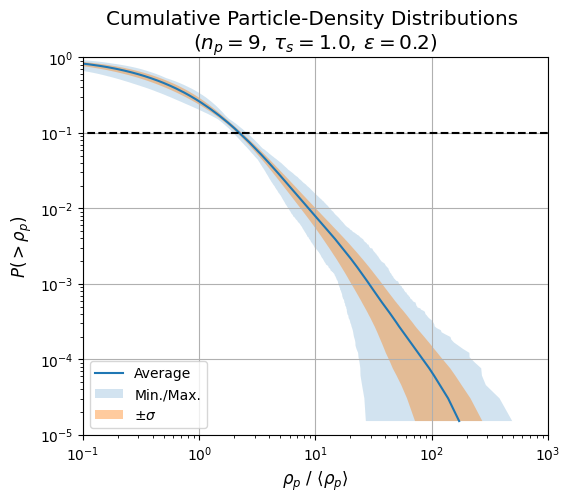

In [18]:
# CPDD
fig, ax = plt.subplots(figsize=(6,5), dpi=100)
# ax.set_aspect('equal')
ax.set_title('Cumulative Particle-Density Distributions \n'\
             +r'($n_p=9,\,\tau_s={:.1f},\,\epsilon={:.1f}$)'
             .format(tau_s, epsilon), size='x-large')
ax.set_xlabel(r'$\rho_p$ / $\langle \rho_p \rangle$', size='large')
ax.set_ylabel(r'$P(>\rho_p)$', size='large')
ax.loglog(np9_avg_rhops, np9_cdf, label='Average')
ax.fill_betweenx(np9_cdf, np9_min_rhops, np9_max_rhops, alpha=0.2,
                 label='Min./Max.')
ax.fill_betweenx(np9_cdf, np9_avg_rhops-np9_std_rhops,
                 np9_avg_rhops+np9_std_rhops, alpha=0.4,
                 label=r'$\pm\sigma$')
ax.plot([1e-2, 1e3], [1e-1, 1e-1], '--', color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.1, 1000)
ax.set_ylim(1e-5, 1)
ax.legend(loc='lower left')
ax.grid()
plt.savefig('misc/plots/CPDD_np9.png', bbox_inches='tight',
            pad_inches=0.01)

### np16

In [19]:
# load NAS results
data = np.loadtxt('txt/CPDD_np16_min.txt') # return (N, 2) array
np16_cdf = data[:, 1]                      # return only 2nd col
np16_min_rhops = data[:, 0]                # return only 1st col
data = np.loadtxt('txt/CPDD_np16_max.txt')
np16_max_rhops = data[:, 0]
data = np.loadtxt('txt/CPDD_np16_avg.txt')
np16_avg_rhops = data[:, 0]
data = np.loadtxt('txt/CPDD_np16_std.txt')
np16_std_rhops = data[:, 0]

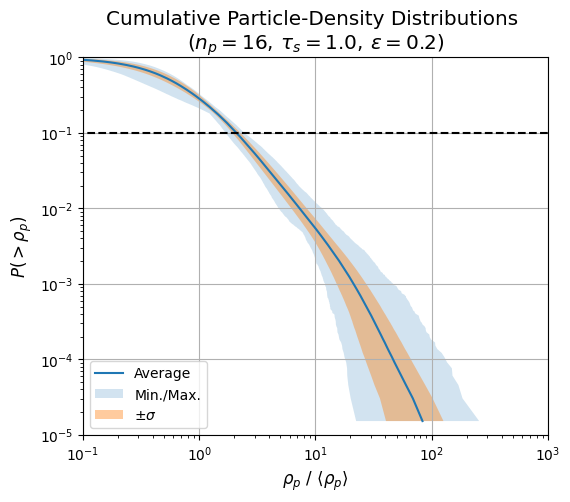

In [20]:
# CPDD
fig, ax = plt.subplots(figsize=(6,5), dpi=100)
# ax.set_aspect('equal')
ax.set_title('Cumulative Particle-Density Distributions \n'\
             +r'($n_p=16,\,\tau_s={:.1f},\,\epsilon={:.1f}$)'
             .format(tau_s, epsilon), size='x-large')
ax.set_xlabel(r'$\rho_p$ / $\langle \rho_p \rangle$', size='large')
ax.set_ylabel(r'$P(>\rho_p)$', size='large')
ax.loglog(np16_avg_rhops, np16_cdf, label='Average')
ax.fill_betweenx(np16_cdf, np16_min_rhops, np16_max_rhops, alpha=0.2,
                 label='Min./Max.')
ax.fill_betweenx(np16_cdf, np16_avg_rhops-np16_std_rhops,
                 np16_avg_rhops+np16_std_rhops, alpha=0.4,
                 label=r'$\pm\sigma$')
ax.plot([1e-2, 1e3], [1e-1, 1e-1], '--', color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.1, 1000)
ax.set_ylim(1e-5, 1)
ax.legend(loc='lower left')
ax.grid()
plt.savefig('misc/plots/CPDD_np16.png', bbox_inches='tight',
            pad_inches=0.01)

## np25

In [21]:
# load NAS results
data = np.loadtxt('txt/CPDD_np25_min.txt') # return (N, 2) array
np25_cdf = data[:, 1]                      # return only 2nd col
np25_min_rhops = data[:, 0]                # return only 1st col
data = np.loadtxt('txt/CPDD_np25_max.txt')
np25_max_rhops = data[:, 0]
data = np.loadtxt('txt/CPDD_np25_avg.txt')
np25_avg_rhops = data[:, 0]
data = np.loadtxt('txt/CPDD_np25_std.txt')
np25_std_rhops = data[:, 0]

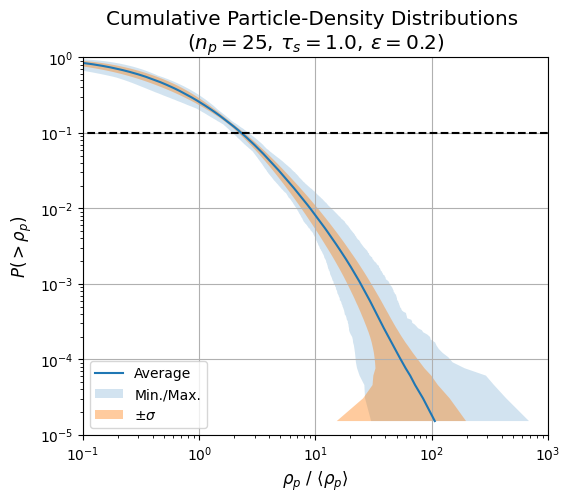

In [27]:
# CPDD
fig, ax = plt.subplots(figsize=(6,5), dpi=100)
# ax.set_aspect('equal')
ax.set_title('Cumulative Particle-Density Distributions \n'\
             +r'($n_p=25,\,\tau_s={:.1f},\,\epsilon={:.1f}$)'
             .format(tau_s, epsilon), size='x-large')
ax.set_xlabel(r'$\rho_p$ / $\langle \rho_p \rangle$', size='large')
ax.set_ylabel(r'$P(>\rho_p)$', size='large')
ax.loglog(np25_avg_rhops, np25_cdf, label='Average')
ax.fill_betweenx(np25_cdf, np25_min_rhops, np25_max_rhops, alpha=0.2,
                 label='Min./Max.')
ax.fill_betweenx(np25_cdf, np25_avg_rhops-np25_std_rhops,
                 np25_avg_rhops+np25_std_rhops, alpha=0.4,
                 label=r'$\pm\sigma$')
ax.plot([1e-2, 1e3], [1e-1, 1e-1], '--', color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.1, 1000)
ax.set_ylim(1e-5, 1)
ax.legend(loc='lower left')
ax.grid()
plt.savefig('misc/plots/CPDD_np25.png', bbox_inches='tight',
            pad_inches=0.01)

## CPDDs (Log Std. Dev.)

The arithmetic **standard deviation** of a lognormal distribution is

$$ \textrm{SD}[X] = e^{\mu+\frac{1}{2} \sigma^{2}} \sqrt{e^{\sigma^{2}}-1}, $$

where $\mu$ and $\sigma$ are the mean and standard deviation of distribution's natural logarithm.

### References
1. [Log-normal distribution (Wikipedia)](https://en.wikipedia.org/wiki/Log-normal_distribution)
2. [§ 1.3.6.6.9. Lognormal Distribution](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3669.htm#:~:text=where%20%CF%83is%20the%20shape%20parameter%28and%20is%20the%20standard,m%3D%201%20is%20called%20the%20standard%20lognormal%20distribution.) of [NIST/SEMATECH e-Handbook of Statistical Methods](http://www.itl.nist.gov/div898/handbook/)

## np25

In [28]:
# load NAS results
data = np.loadtxt('txt/CPDD_np25_min.txt') # return (N, 2) array
np25_cdf = data[:, 1]                      # return only 2nd col
np25_min_rhops = data[:, 0]                # return only 1st col
data = np.loadtxt('txt/CPDD_np25_max.txt')
np25_max_rhops = data[:, 0]
data = np.loadtxt('txt/CPDD_np25_avg.txt')
np25_avg_rhops = data[:, 0]
data = np.loadtxt('txt/CPDD_np25_logstd.txt')
np25_logstd_rhops = data[:, 0]

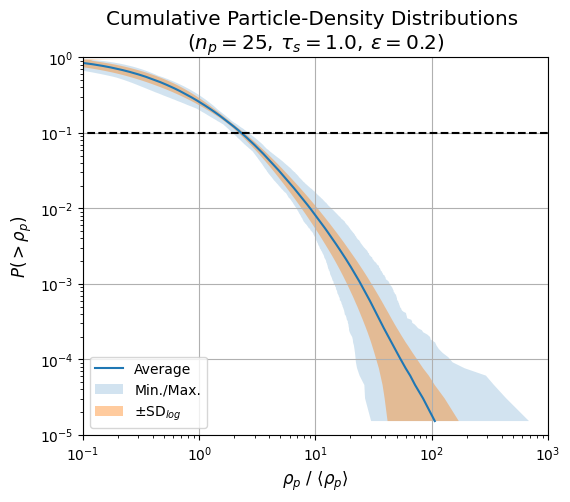

In [29]:
# CPDD
fig, ax = plt.subplots(figsize=(6,5), dpi=100)
# ax.set_aspect('equal')
ax.set_title('Cumulative Particle-Density Distributions \n'\
             +r'($n_p=25,\,\tau_s={:.1f},\,\epsilon={:.1f}$)'
             .format(tau_s, epsilon), size='x-large')
ax.set_xlabel(r'$\rho_p$ / $\langle \rho_p \rangle$', size='large')
ax.set_ylabel(r'$P(>\rho_p)$', size='large')
ax.loglog(np25_avg_rhops, np25_cdf, label='Average')
ax.fill_betweenx(np25_cdf, np25_min_rhops, np25_max_rhops, alpha=0.2,
                 label='Min./Max.')
ax.fill_betweenx(np25_cdf, np25_avg_rhops-np25_logstd_rhops,
                 np25_avg_rhops+np25_logstd_rhops, alpha=0.4,
                 label=r'$\pm$SD$_{log}$')
ax.plot([1e-2, 1e3], [1e-1, 1e-1], '--', color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.1, 1000)
ax.set_ylim(1e-5, 1)
ax.legend(loc='lower left')
ax.grid()
plt.savefig('misc/plots/CPDD_np25_SDlog.png', bbox_inches='tight',
            pad_inches=0.01)

## Tasks
- [x] Undestand probability density function (PDF)
- [x] Why does combining PDF and CDF always normalize (max 1)?
- [x] Read §§ 4, 4.1, 4.2
- [x] No sum needed; raw values from each zone/cell
- [x] Rewrite CPDD algo using histogram func
  - [x] Consider appropriate bin size (cf. JY07)
- [x] Check 256$^2$, `np25` results against w/ JY07
- [x] Debug script if unsure of results
- [x] Try modifying original CDF method by cutting off < 0.1 counts (should renormalize)
- [x] Script to avg CPDD over saturation outputs
- [x] Read & plot averaged CPDD_np4.txt results from NAS
- [x] Set up cpdd.py & cpdd.pbs for np9 - np25
- [x] CPDD comparison plot of each run (cf. Fig. 11)
- [x] Rewrite script w/o cutting (see comments in cell below)
- [ ] Compute 
- (Old)
  - [ ] ? Measure density contrast/turbulent properties
  - [ ] ? Morphology difference, but growth properties

In [25]:
# Chao-Chin:
# NO CUTTING
# - Sort each snapshot in increasing order
# - Determine min/max values over snapshot range,
#   for largest cell value, second largest, so on
#   (i.e., copy line 62 for a min and max series)
# - plot w/ 3 lines: min, avg, max
# - compute std_dev of values over time (plot w/
#   horizontal err. bars for each data pt., i.e.
#   "cell")